### Step 1

EDA

In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
with open('ultimate_data_challenge.json', 'r') as file:
    file_content = file.read()
    data = json.loads(file_content)
    df = pd.DataFrame(data)

df.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [4]:
df.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000


In [5]:
# Convert date columns to datetimes
df['last_trip_date'] = pd.to_datetime(df['last_trip_date'])
df['signup_date'] = pd.to_datetime(df['signup_date'])

In [6]:
# Fraction of users retained
sum(df['last_trip_date'] > '2014-05-31')/len(df)

0.37608

In [7]:
# Create target variable
df['active'] = (df['last_trip_date'] > '2014-05-31')

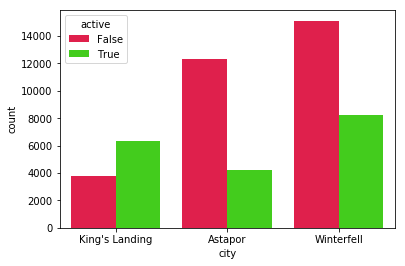

In [8]:
# Retention by city
sns.countplot(df['city'], hue=df['active'], palette='prism_r')

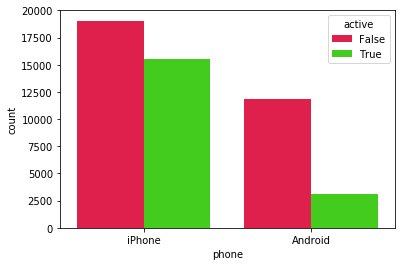

In [9]:
# Retention by phone
sns.countplot(df['phone'], hue=df['active'], palette='prism_r')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
active                    50000 non-null bool
dtypes: bool(2), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.3+ MB


In [11]:
# Convert 'active' to type 'int' so that sns.pairplot() will accept it
df['active'] = df['active'].astype('int')

/Users/brysonsicotte/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/brysonsicotte/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


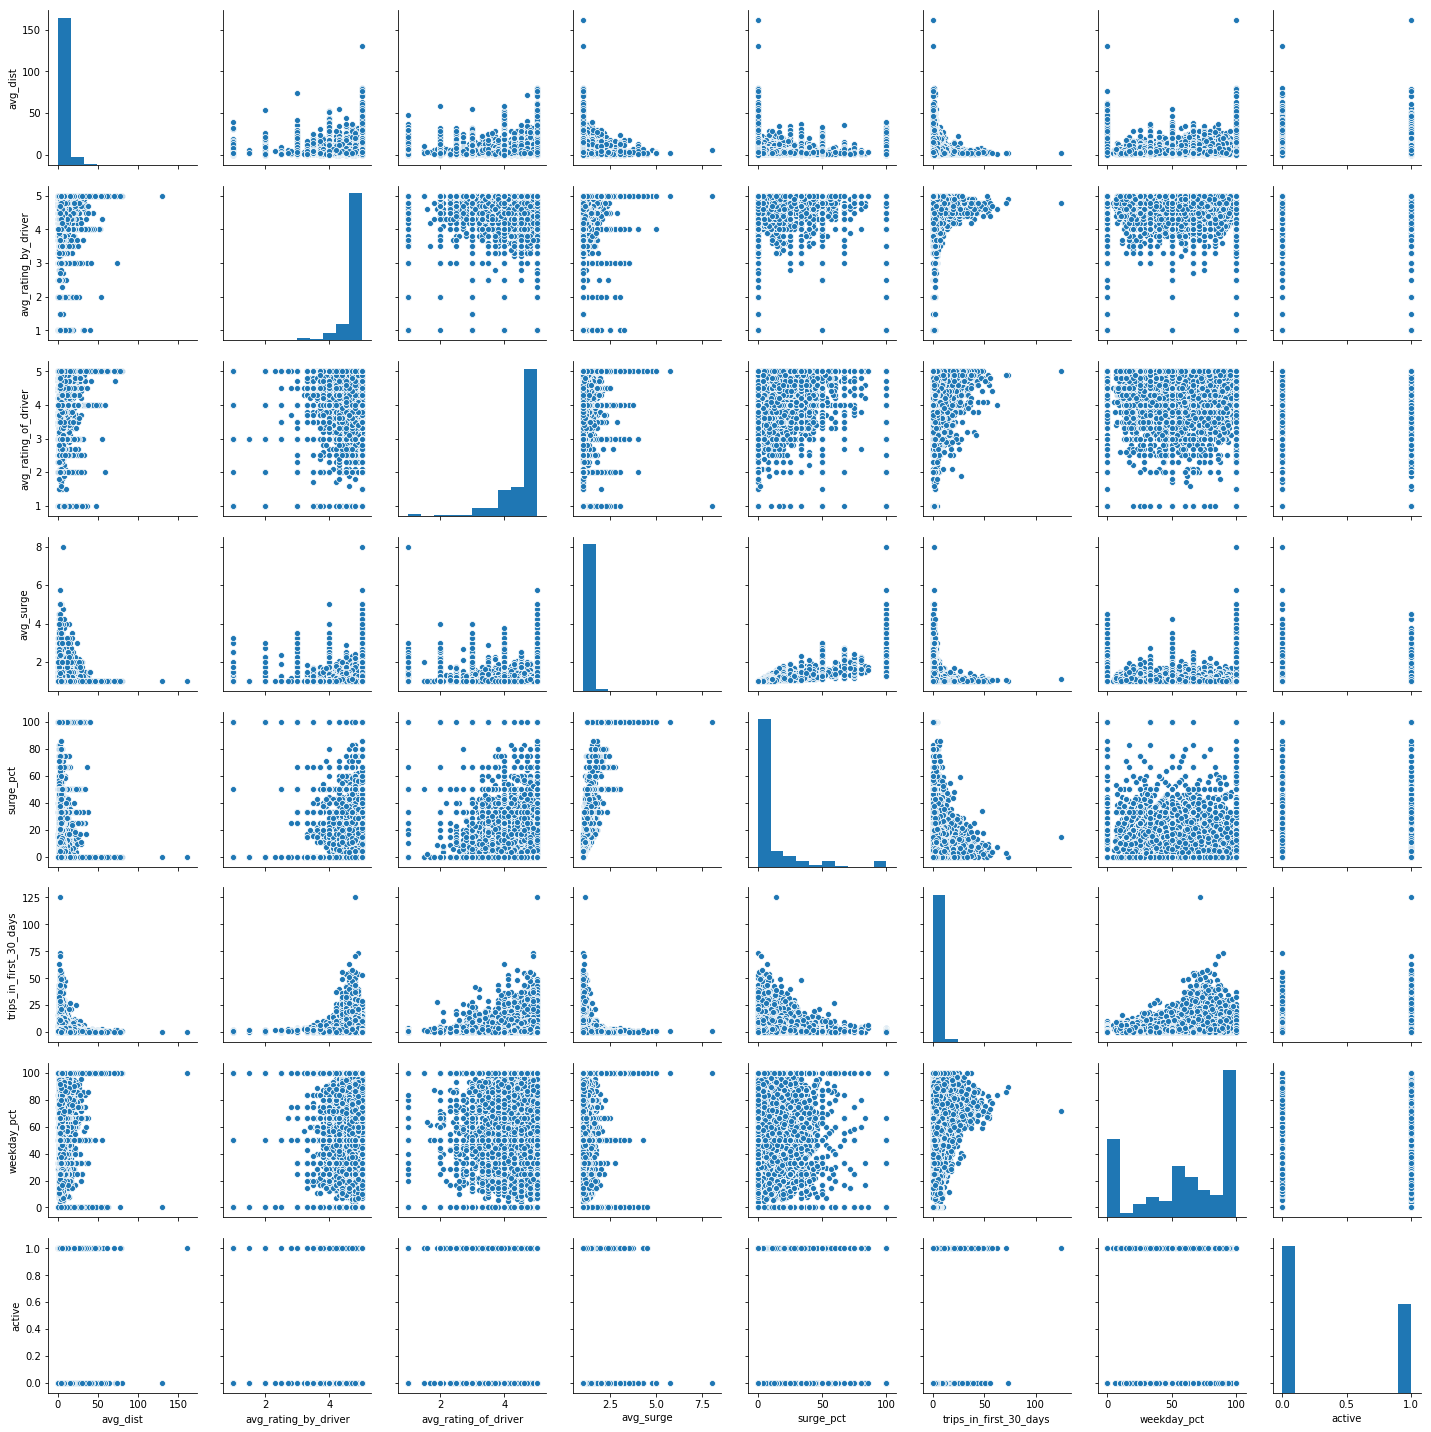

In [12]:
# Create a pairplot of the numeric columns
numeric_cols = ['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge', 
                'surge_pct', 'trips_in_first_30_days', 'weekday_pct','active']

sns.pairplot(df[numeric_cols])

A number of the pairplots above show correlations with each other. For example, as 'surge_pct' increases, 'trips_in_first_30_days' decreases. These relationships are worth revisiting. We ultimately want to de-correlate features to help improve model performance.

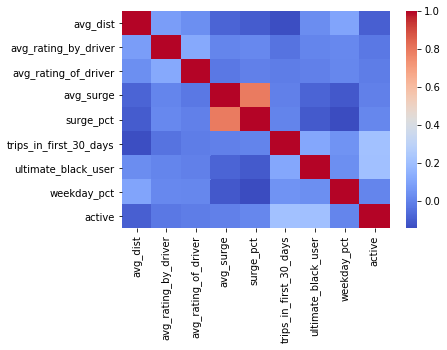

In [13]:
# Vizualizing correlations of numeric columns
sns.heatmap(df.corr(), cmap='coolwarm')

In [14]:
# The correlation of numeric features with 'active' riders ranked from highest to lowest.
df.corr()['active'].sort_values(ascending=False)

active                    1.000000
trips_in_first_30_days    0.210463
ultimate_black_user       0.205002
surge_pct                 0.011797
weekday_pct               0.009693
avg_surge                -0.003333
avg_rating_of_driver     -0.011653
avg_rating_by_driver     -0.026791
avg_dist                 -0.092780
Name: active, dtype: float64

It seems that taking a trip in the first 30 days after signing up is correlated with being 'active', as is being an Ultimate Black User. The Ultimate team may find this useful in determine which customers to focus their attention on.

Next, we need to encode categorical variables and replace the non-encoded columns.

In [15]:
# fill null values 
df['phone'].fillna('Other', inplace=True)

# encode categorical variables
phone_encoded = pd.get_dummies(df['phone'])
city_encoded = pd.get_dummies(df['city'])

In [16]:
df = df.join(phone_encoded).join(city_encoded)

In [17]:
df.drop(['city', 'phone'], axis=1, inplace=True)

In [18]:
# move target variable to the end
last_col = ['active']
df = df[[col for col in df if col not in last_col]
       + [col for col in last_col]]

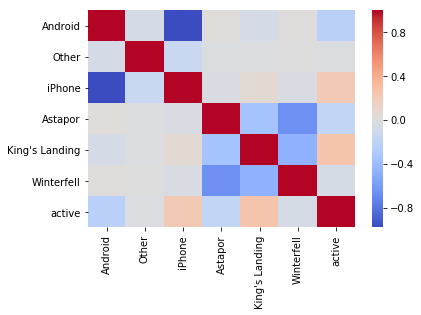

In [19]:
# Vizualizing correlations of categorical columns
categoricals = df.iloc[:,-7:]
sns.heatmap(categoricals.corr(), cmap='coolwarm')

In [20]:
# The correlation of categorical features with 'active' riders ranked from highest to lowest.
categoricals.corr()['active'].sort_values(ascending=False)

active            1.000000
King's Landing    0.262284
iPhone            0.225244
Other            -0.007419
Winterfell       -0.046611
Astapor          -0.174655
Android          -0.225464
Name: active, dtype: float64

We find here that being from King's Landing and having an iPhone are relatively strong predictors of being active.  Conversely, being from Astapor and having an Android phone are relatively strong predictors of not being active. Unsurprisingly, the strongest negative correlation in the heatmap occurs between iPhone and Android users.

In [21]:
# convert 'signup_date' to int so it can be used in models
df['signup_date'] = df['signup_date'].dt.strftime('%Y%m%d').astype(int)

In [22]:
# remove last_trip_date so that it doesn't artifically create a strong model
df.drop(['last_trip_date'], axis=1, inplace=True)

In [23]:
# fill NaNs
df['avg_rating_by_driver'].fillna(np.mean(df['avg_rating_by_driver']),inplace=True)
df['avg_rating_of_driver'].fillna(np.mean(df['avg_rating_of_driver']), inplace=True)

I chose to impute with the mean rather than the median in this case, because outliers are not a problem.

At this point all missing values have been filled and all columns are numeric. The data is ready for machine learning.

### Step 2

Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

To achieve a benchmark performance, I chose a logistic regression model for the dataset. Logistic regression is designed for predicting binary outcomes, it is easy to implement, and efficient to train. As long as the data follows a linear path, logistic regression will perform well.

As an alternative model, I tested a random forest classifier. A random forest is bit more computationally intensive, and requires some hyper-parameter tuning, but generally produces a relatively accurate model for a wide range of tasks. It is also useful with high dimensionality, so it won’t have any trouble with our dozen-or-so features here. Random forests also do well with non-linear data; so in the event that our dataset has some non-linear qualities, we would expect random forest to outperform logistic regression.

In [25]:
# Divide the data into features and target
X = df.drop('active', axis=1)
y = df.iloc[:,-1]

In [26]:
# Scale the features (X)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X)

/Users/brysonsicotte/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/brysonsicotte/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype bool, uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [27]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)

Test a Logistic Regression classifier

In [28]:
# Train and fit a logistic regression model on the training set
lr = LogisticRegression()
lr.fit(X_train, y_train)

/Users/brysonsicotte/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [29]:
# Predict values for the test data
predictions = lr.predict(X_test)

In [30]:
# Classification Report and Confusion Matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.74      0.85      0.79      7799
           1       0.67      0.49      0.57      4701

   micro avg       0.72      0.72      0.72     12500
   macro avg       0.70      0.67      0.68     12500
weighted avg       0.71      0.72      0.71     12500

[[6656 1143]
 [2392 2309]]


In [31]:
y_pred_prob = lr.predict_proba(X_test)[:,1]
print("ROC AUC score for logistic regression is: %.3f" %roc_auc_score(y_test, y_pred_prob))

ROC AUC score for logistic regression is: 0.765


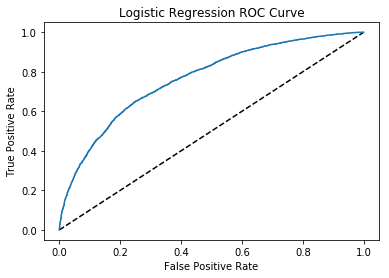

In [32]:
    fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Logistic Regression ROC Curve')
    plt.show()

For comparison, let's try a random forest classifier.

In [33]:
# Perform Grid-search
gsc = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid={
        'max_depth': range(3,10)
    },
    cv=5, verbose=0, n_jobs=-1
)

grid_result = gsc.fit(X, y)
best_params = grid_result.best_params_

rf = RandomForestClassifier(max_depth=best_params['max_depth'],
                           n_estimators=100,
                           random_state=False,
                           verbose=False)

/Users/brysonsicotte/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [34]:
# Train and fit the random forest model with the best hyperparameters on the training set
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=False, verbose=False,
            warm_start=False)

In [35]:
# Predict values for the test data
predictions = rf.predict(X_test)

In [36]:
# Classification Report and Confusion Matrix
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

           0       0.80      0.87      0.84      7799
           1       0.75      0.64      0.69      4701

   micro avg       0.79      0.79      0.79     12500
   macro avg       0.78      0.76      0.76     12500
weighted avg       0.78      0.79      0.78     12500

[[6792 1007]
 [1675 3026]]


In [37]:
y_pred_prob = rf.predict_proba(X_test)[:,1]
print("ROC AUC score for random forest is: %.3f" %roc_auc_score(y_test, y_pred_prob))

ROC AUC score for random forest is: 0.852


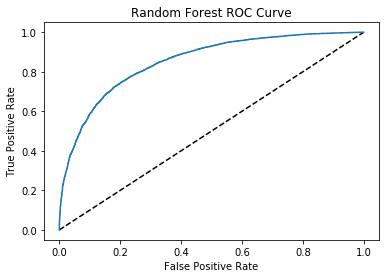

In [38]:
    fpr, tpr, thresholds  = roc_curve(y_test, y_pred_prob)
    plt.plot([0,1], [0,1], 'k--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Random Forest ROC Curve')
    plt.show()

Of the two models tested above, the random forest performed the best, producing a precision of 0.78. This is 0.16 better than the baseline of 0.62; which was simply predicting all users as "not retained." The ROC AUC score for the random forest also outperformed logistic regression by margin of 0.087 (0.852 vs 0.765).

### Step 3

Now that we have a model that can more accurately predict the riders that are most likely to be long-term customers, we can generate a list of these customers, and find ways to retain them. Ultimate might consider running promotions and incentives that encourage loyalty, and can avoid wasting marketing dollars on riders that are not likely to be long-term customers.

Furthermore, having discovered the most useful features in the dataset, Ultimate can confidently target customers that fall in certain categories, such as having an iPhone, or being a resident of King's landing.